<H1>FM EC-module tests</H1>

<H2>PolyTim interpolation (boundaries)</H2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os

In [2]:
# Some stuff needed in the calculation

# Intersection between two line segments, 
# expressed as a fraction of the first segment (p1->p2)
def crs(p1,p2,p3,p4):
    # intersection lambda of lines p1->p2 and p3->p4
    # in terms of vector p1->p2
    l = ((p3[0]-p1[0])*(p3[1]-p4[1])-(p3[1]-p1[1])*(p3[0]-p4[0]))                \
      / ((p2[0]-p1[0])*(p3[1]-p4[1])-(p2[1]-p1[1])*(p3[0]-p4[0]))
    return(np.array([l,1.-l]))

def time_interpolation(time_asked, tslist):
    results = []
    for ts in tslist:
        if ((time_asked<ts[0,0]) or (time_asked>ts[-1,0])):
            results.append(np.NaN)
        else:
            for itime in range(ts.shape[0]-1):
                if ((time_asked - ts[itime,0])*(time_asked - ts[itime+1,0])<0):
                    break
            t1 = ts[itime,0]
            t2 = ts[itime+1,0]
            wt = (ts[itime+1,0] - time_asked)/(ts[itime+1,0] - ts[itime,0])
            val = wt*ts[itime,1] + (1.-wt)* ts[itime+1,1]
            results.append(val)
    return(results)


<H2>Test f01-c001</H2>

<h3>Calculation</h3>

Input: Two time series (old style) for two support points

In [3]:
tim01 = np.loadtxt('tfl_01_0001.tim')
tim02 = np.loadtxt('tfl_01_0002.tim')
bndpair=[[0.0,0.0],[0.0,1.5]]                                # boundary cell face, pli-segment

In [4]:
# Time is given in minutes in these .tim files, so convert to seconds
to_seconds = 60.0
tim01[:,0] = tim01[:,0]*to_seconds
tim02[:,0] = tim02[:,0]*to_seconds

Copied from the test configuration file:

In [5]:
Times                = 10.0, 20.0, 30.0, 40.0                # times for requesting data from EC-module
LocationsX           =  0.75,   0.75,   0.75                 # location X-coordinate   
LocationsY           =  0.667,  1.000,  1.333                # location Y-coordinate
LocationsX2          = -1.000, -1.000, -1.000                # location X-coordinate   
LocationsY2          =  0.667,  1.000,  1.333                # location Y-coordinate
npt = len(LocationsX)

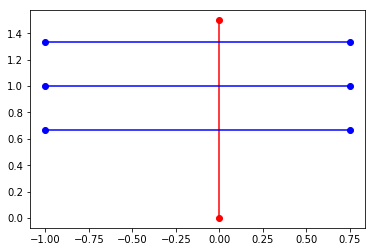

In [10]:
# definition of a pair of support points
xbnd = np.array([bndpair[0][0],bndpair[1][0]])
ybnd = np.array([bndpair[0][1],bndpair[1][1]])
fig = plt.figure();
plt.plot(xbnd, ybnd, "ro",xbnd, ybnd, "r-"); 

# definition of flow links
ws = []
for ipt in range(npt):
    flowlink=[[LocationsX[ipt],LocationsY[ipt]], [LocationsX2[ipt],LocationsY2[ipt]]]    

    # determine spatial interpolation weight
    ws.append(crs(np.array(bndpair[0]),np.array(bndpair[1]),np.array(flowlink[0]),np.array(flowlink[1]))) 
    
    # plot 
    xflow = np.array([flowlink[0][0],flowlink[1][0]])
    yflow = np.array([flowlink[0][1],flowlink[1][1]])
    plt.plot(xflow, yflow, "bo",xflow, yflow, "b-"); 

# fig.suptitle("Weigth factor at intersection : %f"%(ws[0]))
plt.show()


In [9]:
ws     # Show the derived weight functions

[array([ 0.44466667,  0.55533333]),
 array([ 0.66666667,  0.33333333]),
 array([ 0.88866667,  0.11133333])]

In [33]:
for time_asked in Times:
    interp = []
    values_at_support_points = time_interpolation(time_asked,[tim01,tim02])
    for iw in range(len(ws)):
        interpval = np.dot(ws[iw],values_at_support_points)
        interp.append(interpval)
    print time_asked, interp

10.0 [0.00016666666666666718, 0.00016666666666666718, 0.00016666666666666718]
20.0 [0.00033333333333333327, 0.00033333333333333327, 0.00033333333333333327]
30.0 [0.00050000000000000044, 0.00050000000000000044, 0.00050000000000000044]
40.0 [0.00066666666666666654, 0.00066666666666666654, 0.00066666666666666654]


<h3>Test results</h3>

In [16]:
testdir = './'
outfile = 'test01.out'
tstfile = 'test01.ref'

In [31]:
rawrefdata = np.loadtxt(os.path.join(testdir,reffile))
rawtstdata = np.loadtxt(os.path.join(testdir,tstfile))

In [34]:
rawrefdata

array([[  1.00000000e+00,   1.66666667e-05,   1.66666667e-05],
       [  2.00000000e+00,   3.33333333e-05,   3.33333333e-05],
       [  3.00000000e+00,   6.00000000e-05,   5.00000000e-05],
       [  4.00000000e+00,   6.66666667e-05,   6.66666667e-05]])

Retrieve reference and test data:

In [38]:
reftimes = rawrefdata[:,0]
tsttimes = rawtstdata[:,0]
refvalues = rawrefdata[:,1:]
tstvalues = rawtstdata[:,1:]

In [39]:
tstvalues

array([[  1.66666667e-05,   1.66666667e-05],
       [  3.33333333e-05,   3.33333333e-05],
       [  6.00000000e-05,   5.00000000e-05],
       [  6.66666667e-05,   6.66666667e-05]])

In [21]:
tim01[:,0] = tim01[:,0]*f_time_seconds
tim02[:,0] = tim02[:,0]*f_time_seconds

In [52]:
tim01

array([[  0.00000000e+00,   0.00000000e+00],
       [  3.60000000e+04,   1.00000000e-02],
       [  7.20000000e+04,   0.00000000e+00],
       [  1.08000000e+05,  -1.00000000e-02],
       [  1.44000000e+05,   0.00000000e+00],
       [  1.80000000e+05,   1.00000000e-02],
       [  2.16000000e+05,   0.00000000e+00],
       [  2.52000000e+05,  -1.00000000e-02],
       [  2.88000000e+05,   0.00000000e+00],
       [  3.24000000e+05,   1.00000000e-02],
       [  3.60000000e+05,   0.00000000e+00],
       [  3.96000000e+05,  -1.00000000e-02],
       [  4.32000000e+05,   0.00000000e+00]])

<b>Interpolate each timeseries at the requested time ...</b>

In [78]:
print values_at_support_points

[0.0044444444444444444, 0.0094949494949495023]


In [93]:
bndpair[0][0]

0.0